In [2]:
from pandas import read_csv
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

C:\Users\bhada\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [50]:
series = pd.read_csv('sorted_part2.csv')

In [51]:
series.columns

Index(['Date', 'Review'], dtype='object')

In [15]:
training_set = series.iloc[:,1:2].values    

In [16]:
training_set = training_set.astype('float32')

In [53]:
ts = series['Review']
ts.head()

0    1
1    1
2    1
3    1
4    1
Name: Review, dtype: int64

In [17]:
size = int(len(training_set) * 0.80)

In [18]:
train, test = training_set[0:size], training_set[size:len(training_set)]

In [19]:
history = [x for x in train]

In [20]:
predictions = list()

In [21]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=2.535486, expected=1.000000
predicted=2.427285, expected=1.000000
predicted=1.816999, expected=2.000000
predicted=2.091980, expected=4.000000
predicted=2.550621, expected=2.000000
predicted=2.542361, expected=5.000000
predicted=2.451499, expected=2.000000
predicted=2.750228, expected=1.000000
predicted=2.512845, expected=7.000000
predicted=3.512304, expected=3.000000
predicted=3.673999, expected=6.000000
predicted=3.851281, expected=3.000000
predicted=3.655999, expected=3.000000
predicted=3.788034, expected=3.000000
predicted=4.071010, expected=8.000000
predicted=4.529449, expected=3.000000
predicted=4.513004, expected=3.000000
predicted=3.547772, expected=3.000000
predicted=3.738971, expected=5.000000
predicted=4.338349, expected=1.000000
predicted=3.843514, expected=2.000000
predicted=2.624562, expected=5.000000
predicted=3.258075, expected=2.000000
predicted=3.187663, expected=6.000000
predicted=3.377441, expected=3.000000
predicted=3.291681, expected=3.000000
predicted=3.

predicted=1.813079, expected=1.000000
predicted=1.622799, expected=6.000000
predicted=2.442124, expected=4.000000
predicted=2.850727, expected=1.000000
predicted=2.333402, expected=3.000000
predicted=2.566996, expected=2.000000
predicted=2.941906, expected=4.000000
predicted=3.334935, expected=1.000000
predicted=2.499755, expected=4.000000
predicted=2.446453, expected=6.000000
predicted=3.500005, expected=2.000000
predicted=3.190193, expected=1.000000
predicted=2.780734, expected=3.000000
predicted=2.862217, expected=3.000000
predicted=3.281192, expected=1.000000
predicted=2.595601, expected=2.000000
predicted=1.930396, expected=3.000000
predicted=2.249372, expected=2.000000
predicted=2.355196, expected=2.000000
predicted=2.109703, expected=1.000000
predicted=1.821340, expected=2.000000
predicted=1.990729, expected=3.000000
predicted=2.224845, expected=5.000000
predicted=2.587066, expected=3.000000
predicted=2.696785, expected=4.000000
predicted=2.945391, expected=2.000000
predicted=3.

predicted=3.220431, expected=1.000000
predicted=2.935043, expected=2.000000
predicted=2.386692, expected=3.000000
predicted=2.922769, expected=2.000000
predicted=2.705037, expected=3.000000
predicted=2.462215, expected=2.000000
predicted=2.195106, expected=1.000000
predicted=2.108428, expected=6.000000
predicted=2.874693, expected=1.000000
predicted=2.645923, expected=2.000000
predicted=2.277708, expected=3.000000
predicted=2.566143, expected=8.000000
predicted=3.633457, expected=6.000000
predicted=4.484851, expected=5.000000
predicted=4.013993, expected=4.000000
predicted=4.605511, expected=3.000000
predicted=4.805646, expected=3.000000
predicted=4.815088, expected=5.000000
predicted=4.390860, expected=4.000000
predicted=4.077473, expected=3.000000
predicted=3.591560, expected=3.000000
predicted=3.458578, expected=2.000000
predicted=3.334658, expected=1.000000
predicted=2.949173, expected=7.000000
predicted=3.410072, expected=3.000000
predicted=3.364725, expected=2.000000
predicted=2.

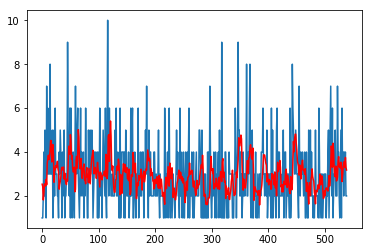

In [22]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [24]:
predictions = [0] * 540
error = mean_squared_error(test, predictions)

In [23]:
len(test)

540

In [25]:
error

11.281481481481482

In [54]:
#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -4.089946
p-value                           0.001006
#Lags Used                       28.000000
Number of Observations Used    2669.000000
Critical Value (1%)              -3.432802
Critical Value (5%)              -2.862624
Critical Value (10%)             -2.567347
dtype: float64


In [30]:
print(train)

[[ 1.]
 [ 1.]
 [ 1.]
 ..., 
 [ 3.]
 [ 1.]
 [ 5.]]


In [5]:
# fetching negative reviews to analyse the trend of reviews
series_neg = pd.read_csv('part2_negative.csv')

In [6]:
series_neg.columns

Index(['Date', 'sign', 'Review_count'], dtype='object')

In [7]:
training_set_neg = series_neg.iloc[:,2:3].values    

In [8]:
training_set_neg = training_set_neg.astype('float32')

In [9]:
size = int(len(training_set_neg) * 0.80)
train_neg, test_neg = training_set_neg[0:size], training_set_neg[size:len(training_set_neg)]

In [10]:
history_neg = [x for x in train_neg]
predictions_neg = list()

In [14]:
for t in range(len(test_neg)):
    model = ARIMA(history_neg, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_neg.append(yhat)
    obs = test_neg[t]
    history_neg.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_neg, predictions_neg[:107])
print('Test MSE: %.3f' % error)

predicted=1.166324, expected=1.000000
predicted=1.219940, expected=3.000000
predicted=1.420258, expected=1.000000
predicted=1.638299, expected=1.000000
predicted=1.408106, expected=1.000000
predicted=1.477769, expected=1.000000
predicted=1.428242, expected=4.000000
predicted=1.739474, expected=1.000000
predicted=1.696397, expected=1.000000
predicted=1.274014, expected=1.000000
predicted=1.482145, expected=1.000000
predicted=1.795993, expected=1.000000
predicted=1.420920, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=2.000000
predicted=1.152245, expected=1.000000
predicted=1.225210, expected=1.000000
predicted=1.093236, expected=1.000000
predicted=1.

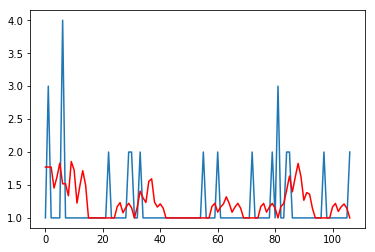

In [16]:
pyplot.plot(test_neg)
pyplot.plot(predictions_neg[:107], color='red')
pyplot.show()